In [57]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import load_model

Chargement des données 

In [39]:
data_dir = "C:/Soilah/Formation/MLP_PRO_ML/Module_1_les_6_pilier_de_l_IA/Mes_projets/Deep Learning/brain tumeur"
train_dir = f"{data_dir}/Training"
test_dir = f"{data_dir}/Testing"


Augmentation des données 

In [42]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size = 30,
    class_mode = 'categorical'
)

val_data = val_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [43]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  

for layer in base_model.layers[-30:]:
    layer.trainable = True

x = GlobalAveragePooling2D()(base_model.output) 
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
out = Dense(4, activation='softmax')(x)  

model = Model(inputs=base_model.input, outputs=out)


### Compilation du modèle

In [44]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Entraînement du modèle

In [46]:
history = model.fit(train_data, validation_data=val_data, epochs=15)

Epoch 1/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.8004 - loss: 0.5286 - val_accuracy: 0.8894 - val_loss: 0.3233
Epoch 2/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 466s 2s/step - accuracy: 0.8719 - loss: 0.3736 - val_accuracy: 0.9161 - val_loss: 0.2250
Epoch 3/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 311s 2s/step - accuracy: 0.9005 - loss: 0.2740 - val_accuracy: 0.9314 - val_loss: 0.1854
Epoch 4/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 299s 2s/step - accuracy: 0.9257 - loss: 0.2092 - val_accuracy: 0.9504 - val_loss: 0.1410
Epoch 5/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 314s 2s/step - accuracy: 0.9472 - loss: 0.1399 - val_accuracy: 0.9588 - val_loss: 0.1104
Epoch 6/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/step - accuracy: 0.9587 - loss: 0.1240 - val_accuracy: 0.9703 - val_loss: 0.0844
Epoch 7/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.9661 - loss: 0.0932 - val_accuracy: 0.9703 - val_loss: 0.0856
Epoch 8/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 279s 1s/step - accuracy: 0.9745 - loss: 0.0751 - val_accu

In [48]:
loss, acc = model.evaluate(val_data)
print(f"Précision sur le set de validation : {acc:.4f}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9901 - loss: 0.0335
Précision sur le set de validation : 0.9832


#### Courbe d'apprentissage 

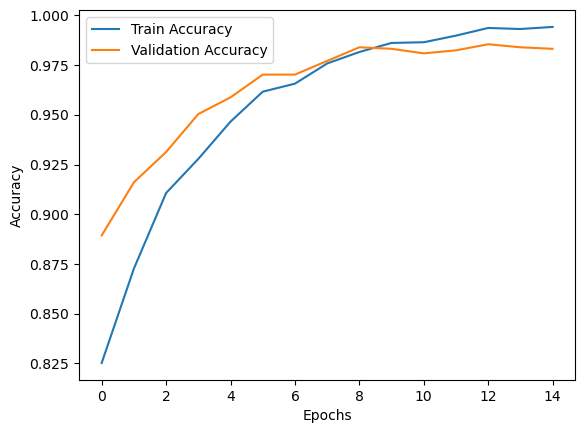

In [50]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Sauvegarde et prediction 

In [54]:
model.save("modele_Densnet_brain_tumor.keras")
def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    plt.imshow(img)
    plt.show()
    
    predictions = model.predict(img_array)
    class_names = list(train_data.class_indices.keys())
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)
    
    
    return predicted_class, confidence


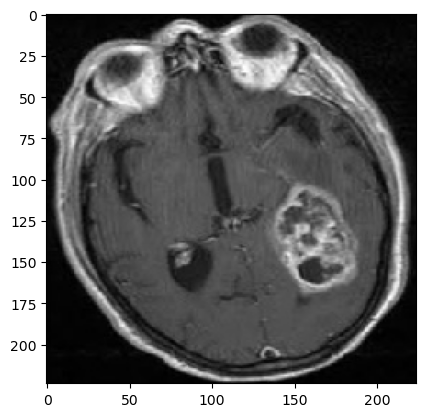

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Prédiction : meningioma (1.00)


In [ ]:
modele_finale = load_model("modele_Densnet_brain_tumor.keras")
image_ = 'Te-meTr_0001.jpg'
pred_class, prob = predict_image(image_, modele_finale)
print(f"Prédiction : {pred_class}  ({prob:.2f})")